# 2012年後

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/house1004.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240149 entries, 0 to 240148
Data columns (total 64 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     240149 non-null  int64  
 1   Column1        240149 non-null  int64  
 2   鄉鎮市區           240130 non-null  object 
 3   交易標的           240149 non-null  object 
 4   土地位置建物門牌       240149 non-null  object 
 5   土地移轉總面積平方公尺    240149 non-null  float64
 6   都市土地使用分區       218861 non-null  object 
 7   非都市土地使用分區      20391 non-null   object 
 8   非都市土地使用編定      20373 non-null   object 
 9   交易年月日          238012 non-null  object 
 10  交易筆棟數          240149 non-null  object 
 11  移轉層次           239998 non-null  object 
 12  總樓層數           239739 non-null  object 
 13  建物型態           240149 non-null  object 
 14  主要用途           239742 non-null  object 
 15  主要建材           239739 non-null  object 
 16  建築完成年月         212738 non-null  float64
 17  建物移轉總面積平方公尺    240149 non-nul

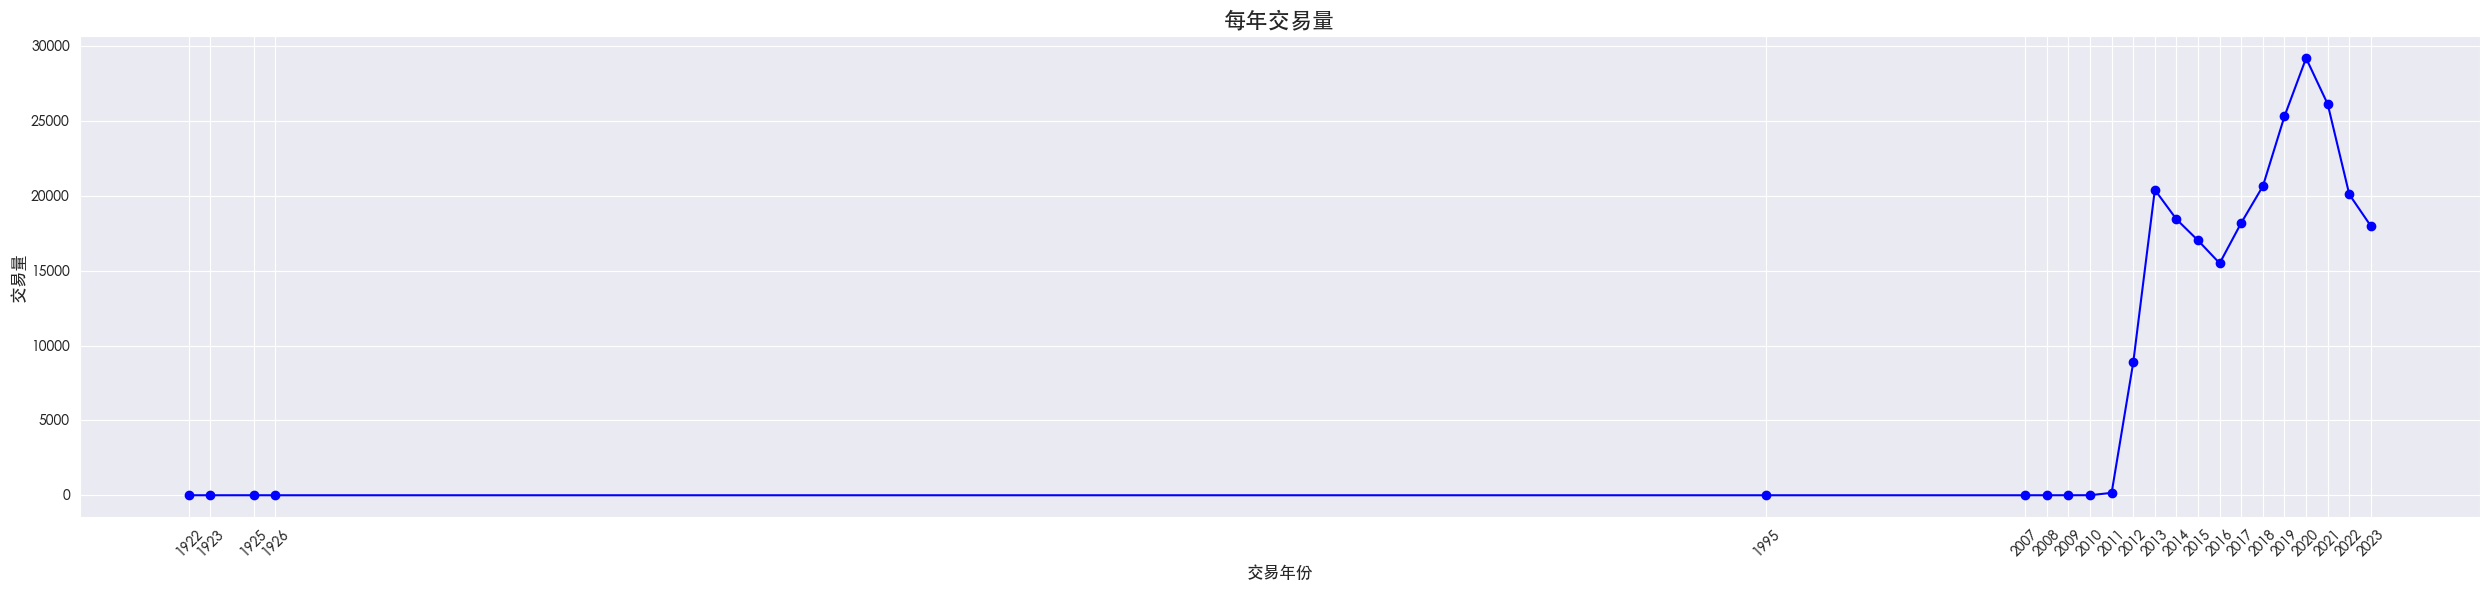

In [4]:
# 假設 df 已經包含數據，先將 '交易年月日' 轉換為 datetime 格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'], errors='coerce')

# 提取年份並新增一個欄位 '交易年份'
df['交易年份'] = df['交易年月日'].dt.year

# 根據年份來統計每年的交易量
transactions_per_year = df.groupby('交易年份').size().reset_index(name='交易量')

# 繪製每年的交易量折線圖
plt.figure(figsize=(25, 6))
plt.plot(transactions_per_year['交易年份'], transactions_per_year['交易量'], marker='o', linestyle='-', color='b')
plt.title('每年交易量', fontsize=16)
plt.xlabel('交易年份', fontsize=12)
plt.ylabel('交易量', fontsize=12)
plt.grid(True)

# 設置X軸標籤並旋轉45度
plt.xticks(transactions_per_year['交易年份'], rotation=45)

# 顯示圖表
plt.tight_layout()
plt.show()

In [5]:
# 先將 '交易年月日' 欄位轉換為 datetime 格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'], errors='coerce')

# 篩選出 2022 年以前的交易
df_before_2022 = df[df['交易年月日'] < '2012-01-01']

# 查看結果
print(df_before_2022[['交易年月日']])

            交易年月日
34536  1926-06-23
34537  2011-05-15
34538  2011-06-14
34539  2011-06-23
34540  2011-05-31
...           ...
211596 2007-09-30
211597 2010-12-30
211598 2010-12-01
230371 2009-09-21
230372 2009-09-21

[178 rows x 1 columns]


In [6]:
# 先將 '交易年月日' 欄位轉換為 datetime 格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'], errors='coerce')

# 篩選出 2022 年以前的交易
df_after_2022 = df[df['交易年月日'] > '2012-01-01']

# 查看結果
print(df_after_2022[['交易年月日']])

            交易年月日
0      2022-09-02
1      2022-08-01
2      2022-08-04
3      2022-08-01
4      2022-08-01
...           ...
238007 2015-11-20
238008 2015-12-09
238009 2015-11-30
238010 2015-11-30
238011 2015-11-25

[237831 rows x 1 columns]


In [7]:
# 直接在原 DataFrame 中刪除 2012 年以前的資料
df = df[df['交易年月日'] >= '2012-01-01']
df.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_2012年後.csv')

# totalPrice outliers

In [8]:
df_2 = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_2012年後.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237834 entries, 0 to 237833
Data columns (total 66 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0.1   237834 non-null  int64  
 1   Unnamed: 0     237834 non-null  int64  
 2   Column1        237834 non-null  int64  
 3   鄉鎮市區           237815 non-null  object 
 4   交易標的           237834 non-null  object 
 5   土地位置建物門牌       237834 non-null  object 
 6   土地移轉總面積平方公尺    237834 non-null  float64
 7   都市土地使用分區       216833 non-null  object 
 8   非都市土地使用分區      20105 non-null   object 
 9   非都市土地使用編定      20087 non-null   object 
 10  交易年月日          237834 non-null  object 
 11  交易筆棟數          237834 non-null  object 
 12  移轉層次           237684 non-null  object 
 13  總樓層數           237425 non-null  object 
 14  建物型態           237834 non-null  object 
 15  主要用途           237428 non-null  object 
 16  主要建材           237425 non-null  object 
 17  建築完成年月         212559 non-nul

In [10]:
pd.set_option('display.max_rows', None)
df_2.isnull().sum()

Unnamed: 0.1          0
Unnamed: 0            0
Column1               0
鄉鎮市區                 19
交易標的                  0
土地位置建物門牌              0
土地移轉總面積平方公尺           0
都市土地使用分區          21001
非都市土地使用分區        217729
非都市土地使用編定        217747
交易年月日                 0
交易筆棟數                 0
移轉層次                150
總樓層數                409
建物型態                  0
主要用途                406
主要建材                409
建築完成年月            25275
建物移轉總面積平方公尺           0
建物現況格局-房              0
建物現況格局-廳              0
建物現況格局-衛              0
建物現況格局-隔間             0
有無管理組織                0
總價元                   0
單價元平方公尺            1604
車位類別             155257
車位移轉總面積(平方公尺)    148736
車位總價元                 0
備註               172454
編號                    0
主建物面積             24010
附屬建物面積            24010
陽台面積              24010
電梯               163316
移轉編號             226482
車位移轉總面積平方公尺       89098
建案名稱             214438
棟及號              217927
解約情形             237812
緯度                    0
經度              

In [11]:
df_2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Column1', '鄉鎮市區', '交易標的', '土地位置建物門牌',
       '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '交易年月日', '交易筆棟數',
       '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材', '建築完成年月', '建物移轉總面積平方公尺',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '總價元',
       '單價元平方公尺', '車位類別', '車位移轉總面積(平方公尺)', '車位總價元', '備註', '編號', '主建物面積',
       '附屬建物面積', '陽台面積', '電梯', '移轉編號', '車位移轉總面積平方公尺', '建案名稱', '棟及號', '解約情形',
       '緯度', '經度', 'bad_count', 'good_count', '建築型態清整', '陽台有無', '是否含額外土地',
       '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝', '房地總價元', '格局比例_房',
       '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石', '建材_鋼筋', '建材_鋼骨',
       '建材_竹木', '住', '商', '工', '農', '交易年份'],
      dtype='object')

In [12]:
# 找出 [單價元平方公尺] 為 NaN 或者為 0 的行
mask = (df_2['單價元平方公尺'].isna()) | (df_2['單價元平方公尺'] == 0)

# 計算 [房地總價元] / [建物移轉總面積平方公尺]，針對滿足條件的行進行計算
df_2.loc[mask, '單價元平方公尺'] = df_2.loc[mask, '房地總價元'] / df_2.loc[mask, '建物移轉總面積平方公尺']

# 查看更新後的數據
print(df_2[mask][['房地總價元', '建物移轉總面積平方公尺', '單價元平方公尺']].head())

         房地總價元  建物移轉總面積平方公尺       單價元平方公尺
1133  38130000       629.70  60552.644116
1140  11700000       197.28  59306.569343
1305   9511976       334.47  28438.951176
1791   1800000        82.52  21812.893844
1937  41580000       865.86  48021.620123


In [13]:
df_2.isnull().sum()

Unnamed: 0.1          0
Unnamed: 0            0
Column1               0
鄉鎮市區                 19
交易標的                  0
土地位置建物門牌              0
土地移轉總面積平方公尺           0
都市土地使用分區          21001
非都市土地使用分區        217729
非都市土地使用編定        217747
交易年月日                 0
交易筆棟數                 0
移轉層次                150
總樓層數                409
建物型態                  0
主要用途                406
主要建材                409
建築完成年月            25275
建物移轉總面積平方公尺           0
建物現況格局-房              0
建物現況格局-廳              0
建物現況格局-衛              0
建物現況格局-隔間             0
有無管理組織                0
總價元                   0
單價元平方公尺               0
車位類別             155257
車位移轉總面積(平方公尺)    148736
車位總價元                 0
備註               172454
編號                    0
主建物面積             24010
附屬建物面積            24010
陽台面積              24010
電梯               163316
移轉編號             226482
車位移轉總面積平方公尺       89098
建案名稱             214438
棟及號              217927
解約情形             237812
緯度                    0
經度              

In [14]:
# 換算坪數
conversion_factor = 3.305785

# 將「建物移轉總面積平方公尺」轉換成坪
df_2['建物移轉總面積坪'] = df_2['建物移轉總面積平方公尺'] * conversion_factor
# 將「單價元平方公尺」轉換成「單價元每坪」
df_2['單價元每坪'] = df_2['單價元平方公尺'] * conversion_factor
df_2['房地總價元(坪)'] = df_2['建物移轉總面積坪'] * df_2['單價元每坪']

In [15]:
df_2.isnull().sum()

Unnamed: 0.1          0
Unnamed: 0            0
Column1               0
鄉鎮市區                 19
交易標的                  0
土地位置建物門牌              0
土地移轉總面積平方公尺           0
都市土地使用分區          21001
非都市土地使用分區        217729
非都市土地使用編定        217747
交易年月日                 0
交易筆棟數                 0
移轉層次                150
總樓層數                409
建物型態                  0
主要用途                406
主要建材                409
建築完成年月            25275
建物移轉總面積平方公尺           0
建物現況格局-房              0
建物現況格局-廳              0
建物現況格局-衛              0
建物現況格局-隔間             0
有無管理組織                0
總價元                   0
單價元平方公尺               0
車位類別             155257
車位移轉總面積(平方公尺)    148736
車位總價元                 0
備註               172454
編號                    0
主建物面積             24010
附屬建物面積            24010
陽台面積              24010
電梯               163316
移轉編號             226482
車位移轉總面積平方公尺       89098
建案名稱             214438
棟及號              217927
解約情形             237812
緯度                    0
經度              

In [17]:
# 找出 [單價元每坪] 為 NaN 或者為 0 的行
mask = (df_2['單價元每坪'].isna()) | (df_2['單價元每坪'] == 0)

# 計算 [房地總價元(坪)] / [建物移轉總面積坪]，針對滿足條件的行進行計算
df_2.loc[mask, '單價元每坪'] = df_2.loc[mask, '房地總價元(坪)'] / df_2.loc[mask, '建物移轉總面積坪']

# 查看更新後的數據
print(df_2[mask][['房地總價元(坪)', '建物移轉總面積坪', '單價元每坪']].head())

       房地總價元(坪)    建物移轉總面積坪  單價元每坪
16147       0.0  110.347103    0.0
43279       0.0   96.727269    0.0
45496       0.0   60.198345    0.0
80121       0.0  150.776854    0.0
83484       0.0  129.950408    0.0


In [18]:
df_2.isnull().sum()

Unnamed: 0.1          0
Unnamed: 0            0
Column1               0
鄉鎮市區                 19
交易標的                  0
土地位置建物門牌              0
土地移轉總面積平方公尺           0
都市土地使用分區          21001
非都市土地使用分區        217729
非都市土地使用編定        217747
交易年月日                 0
交易筆棟數                 0
移轉層次                150
總樓層數                409
建物型態                  0
主要用途                406
主要建材                409
建築完成年月            25275
建物移轉總面積平方公尺           0
建物現況格局-房              0
建物現況格局-廳              0
建物現況格局-衛              0
建物現況格局-隔間             0
有無管理組織                0
總價元                   0
單價元平方公尺               0
車位類別             155257
車位移轉總面積(平方公尺)    148736
車位總價元                 0
備註               172454
編號                    0
主建物面積             24010
附屬建物面積            24010
陽台面積              24010
電梯               163316
移轉編號             226482
車位移轉總面積平方公尺       89098
建案名稱             214438
棟及號              217927
解約情形             237812
緯度                    0
經度              

In [22]:
# # 找出「房地總價元每坪」為 0 或 NaN 的行
# mask = (df_2['房地總價元/坪'].isna()) | (df_2['房地總價元/坪'] == 0)
# # 查看這些行
# result = df_2[mask]

# # 查看結果
# print(result.head())

       Unnamed: 0.1  Unnamed: 0  Column1 鄉鎮市區          交易標的  \
16147         16147       16147    16147  善化區  房地(土地+建物)+車位   
43279         43330       43330    43330  安南區  房地(土地+建物)+車位   
45496         45547       45547    45547  歸仁區  房地(土地+建物)+車位   
80121         80287       80287    80287   北區  房地(土地+建物)+車位   
83484         83650       83650    83650   北區  房地(土地+建物)+車位   

                               土地位置建物門牌  土地移轉總面積平方公尺 都市土地使用分區 非都市土地使用分區  \
16147        臺南市善化區公園路２５３號二樓之１等９４戶之公共設施         0.44        商       NaN   
43279  臺南市安南區北安路三段５０６號９樓之１停車位編號:地下一層２０號         6.43        住       NaN   
45496         臺南市歸仁區歸仁里忠孝北路２２２號二樓之１等３５戶         5.78        住       NaN   
80121             臺南市北區公園南路370巷17號之共有部分         0.08        住       NaN   
83484             臺南市北區公園南路370巷17號之共有部分         0.08        住       NaN   

      非都市土地使用編定  ... 建材_鋼骨 建材_竹木  住  商  工  農    交易年份   建物移轉總面積坪  單價元每坪  \
16147       NaN  ...     0     0  0  1  0  0  2019.0  10.097450    0.0   
43279       NaN  ...  

In [19]:
df_2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Column1', '鄉鎮市區', '交易標的', '土地位置建物門牌',
       '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '交易年月日', '交易筆棟數',
       '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材', '建築完成年月', '建物移轉總面積平方公尺',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '總價元',
       '單價元平方公尺', '車位類別', '車位移轉總面積(平方公尺)', '車位總價元', '備註', '編號', '主建物面積',
       '附屬建物面積', '陽台面積', '電梯', '移轉編號', '車位移轉總面積平方公尺', '建案名稱', '棟及號', '解約情形',
       '緯度', '經度', 'bad_count', 'good_count', '建築型態清整', '陽台有無', '是否含額外土地',
       '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝', '房地總價元', '格局比例_房',
       '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石', '建材_鋼筋', '建材_鋼骨',
       '建材_竹木', '住', '商', '工', '農', '交易年份', '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)'],
      dtype='object')

In [20]:
# 計算四分位數
Q1 = df_2['房地總價元(坪)'].quantile(0.25)
Q3 = df_2['房地總價元(坪)'].quantile(0.75)
IQR = Q3 - Q1

# 計算極端值範圍
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 篩選出極端值
outliers_totalPrice = df_2[(df_2['房地總價元(坪)'] < lower_bound) | (df_2['房地總價元(坪)'] > upper_bound)]

# 將 '房地總價元(坪)' 除以 10000，轉換成每坪萬元
outliers_totalPrice['單價元每坪(萬)'] = outliers_totalPrice['單價元每坪'] / 10000

# 輸出極端值的數量
print(f"極端值數量: {len(outliers_totalPrice)}")
df_2.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_2012年後_outliers_totalPrice.csv')

# # 輸出包含所有欄位的極端值
# print(outliers_totalPrice)

極端值數量: 13185


In [21]:
# 計算四分位數
Q1 = df_2['單價元每坪'].quantile(0.25)
Q3 = df_2['單價元每坪'].quantile(0.75)
IQR = Q3 - Q1

# 計算極端值範圍
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 篩選出極端值
outliers_unitPrice = df_2[(df_2['單價元每坪'] < lower_bound) | (df_2['單價元每坪'] > upper_bound)]

# 輸出極端值的數量
print(f"極端值數量: {len(outliers_unitPrice)}")

# 輸出包含所有欄位的極端值
print(outliers_unitPrice)

極端值數量: 8108
        Unnamed: 0.1  Unnamed: 0  Column1 鄉鎮市區          交易標的  \
4                  4           4        4  中西區     房地(土地+建物)   
44                44          44       44   北區     房地(土地+建物)   
64                64          64       64  安南區     房地(土地+建物)   
67                67          67       67  學甲區     房地(土地+建物)   
83                83          83       83  安南區     房地(土地+建物)   
158              158         158      158  永康區  房地(土地+建物)+車位   
192              192         192      192   東區     房地(土地+建物)   
272              272         272      272  永康區     房地(土地+建物)   
416              416         416      416  安平區     房地(土地+建物)   
463              463         463      463   北區     房地(土地+建物)   
479              479         479      479  中西區     房地(土地+建物)   
511              511         511      511  安平區     房地(土地+建物)   
525              525         525      525   北區     房地(土地+建物)   
527              527         527      527  中西區     房地(土地+建物)   
540              540        

In [21]:
import pandas as pd

# 比對兩個極端值 DataFrame 中的重疊值
overlap_outliers = pd.merge(outliers_unitPrice, outliers_totalPrice, how='inner')

# 輸出重疊的行數
print(f"重疊的極端值數量: {len(overlap_outliers)}")

# 查看重疊的值
print(overlap_outliers)


重疊的極端值數量: 2625
      Unnamed: 0.1  Unnamed: 0  Column1 鄉鎮市區          交易標的  \
0               44          44       44   北區     房地(土地+建物)   
1               67          67       67  學甲區     房地(土地+建物)   
2              192         192      192   東區     房地(土地+建物)   
3              272         272      272  永康區     房地(土地+建物)   
4              479         479      479  中西區     房地(土地+建物)   
5              527         527      527  中西區     房地(土地+建物)   
6              560         560      560  麻豆區     房地(土地+建物)   
7              646         646      646   東區  房地(土地+建物)+車位   
8              687         687      687  中西區     房地(土地+建物)   
9              728         728      728  中西區     房地(土地+建物)   
10             824         824      824  新市區     房地(土地+建物)   
11             828         828      828  歸仁區     房地(土地+建物)   
12             864         864      864  永康區     房地(土地+建物)   
13             983         983      983  安南區  房地(土地+建物)+車位   
14            1345        1345     1345   南區     房地(土地+

In [34]:
# 查看結果，包含 '鄉鎮市區', '房地總價元/坪(每坪十萬)', '備註'
print(outliers_totalPrice[['鄉鎮市區', '單價元每坪(萬)', '備註']])


       鄉鎮市區     單價元每坪(萬)                                                 備註
24      中西區    32.893222                                                NaN
27      永康區    35.862147                              親友、員工、共有人或其他特殊關係間之交易；
44       北區    39.119999                              親友、員工、共有人或其他特殊關係間之交易；
66      學甲區    35.533222  1.本件買賣:土地價金16210000元，建物5250000元；合計21460000元2.買...
67      學甲區    37.122974  1.本件買賣:土地價金17170000元，建物5250000元；合計22420000元2.買...
112     仁德區    16.989421                                                NaN
119      東區    34.078346                                                NaN
127      東區    34.848924                                    陽台外推；頂樓加蓋；其他增建；
139      北區    35.708759                                                 賣清
141     安平區    33.202313                                                NaN
169      南區    24.146776                                         頂樓加蓋；其他增建；
185     安平區    31.003305                                              其他增建；
192      東區 

In [22]:
df_2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Column1', '鄉鎮市區', '交易標的', '土地位置建物門牌',
       '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '交易年月日', '交易筆棟數',
       '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材', '建築完成年月', '建物移轉總面積平方公尺',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '總價元',
       '單價元平方公尺', '車位類別', '車位移轉總面積(平方公尺)', '車位總價元', '備註', '編號', '主建物面積',
       '附屬建物面積', '陽台面積', '電梯', '移轉編號', '車位移轉總面積平方公尺', '建案名稱', '棟及號', '解約情形',
       '緯度', '經度', 'bad_count', 'good_count', '建築型態清整', '陽台有無', '是否含額外土地',
       '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝', '房地總價元', '格局比例_房',
       '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石', '建材_鋼筋', '建材_鋼骨',
       '建材_竹木', '住', '商', '工', '農', '交易年份', '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)'],
      dtype='object')

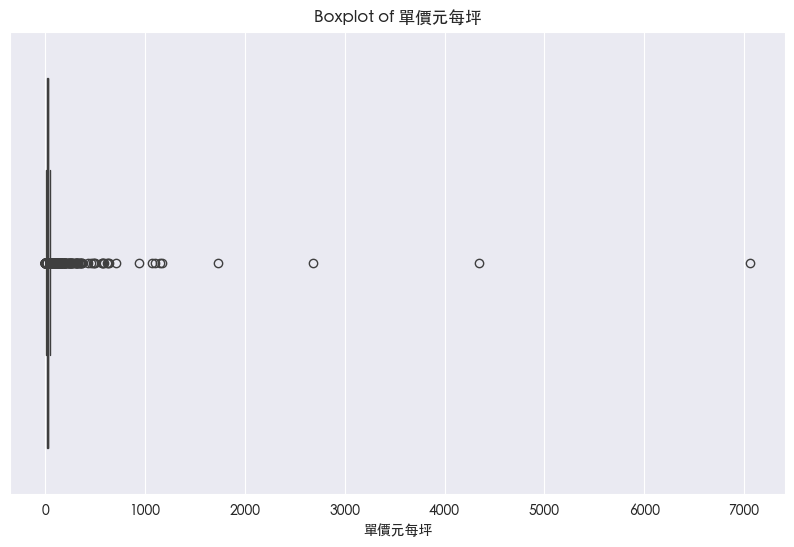

In [23]:
df_2['單價元每坪'] = outliers_totalPrice['單價元每坪'] / 10000

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_2['單價元每坪'])
plt.title('Boxplot of 單價元每坪')
plt.show()

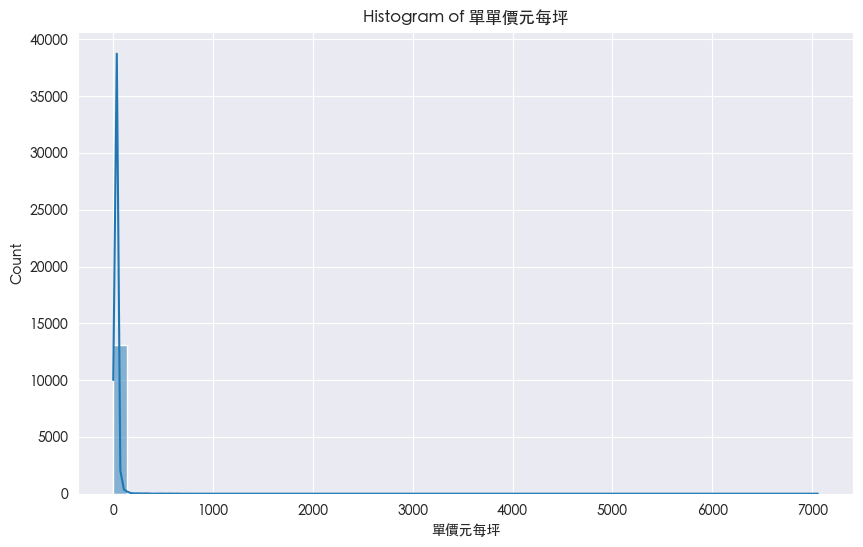

In [24]:

plt.figure(figsize=(10, 6))
sns.histplot(df_2['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單單價元每坪')
plt.show()

In [23]:
df_2_cleaned_totalPrice = df_2.drop(outliers_totalPrice.index)

In [24]:
outliers_totalPrice.index

Index([    24,     27,     44,     66,     67,    112,    119,    127,    139,
          141,
       ...
       237717, 237721, 237730, 237736, 237737, 237738, 237754, 237778, 237830,
       237832],
      dtype='int64', length=13185)

In [27]:
df_2_cleaned_totalPrice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224649 entries, 0 to 237833
Data columns (total 69 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0.1   224649 non-null  int64  
 1   Unnamed: 0     224649 non-null  int64  
 2   Column1        224649 non-null  int64  
 3   鄉鎮市區           224630 non-null  object 
 4   交易標的           224649 non-null  object 
 5   土地位置建物門牌       224649 non-null  object 
 6   土地移轉總面積平方公尺    224649 non-null  float64
 7   都市土地使用分區       204103 non-null  object 
 8   非都市土地使用分區      19652 non-null   object 
 9   非都市土地使用編定      19649 non-null   object 
 10  交易年月日          224649 non-null  object 
 11  交易筆棟數          224649 non-null  object 
 12  移轉層次           224511 non-null  object 
 13  總樓層數           224266 non-null  object 
 14  建物型態           224649 non-null  object 
 15  主要用途           224264 non-null  object 
 16  主要建材           224264 non-null  object 
 17  建築完成年月         201158 non-null  fl

In [25]:
df_2_cleaned_totalPrice.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Column1', '鄉鎮市區', '交易標的', '土地位置建物門牌',
       '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '交易年月日', '交易筆棟數',
       '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材', '建築完成年月', '建物移轉總面積平方公尺',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '總價元',
       '單價元平方公尺', '車位類別', '車位移轉總面積(平方公尺)', '車位總價元', '備註', '編號', '主建物面積',
       '附屬建物面積', '陽台面積', '電梯', '移轉編號', '車位移轉總面積平方公尺', '建案名稱', '棟及號', '解約情形',
       '緯度', '經度', 'bad_count', 'good_count', '建築型態清整', '陽台有無', '是否含額外土地',
       '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝', '房地總價元', '格局比例_房',
       '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石', '建材_鋼筋', '建材_鋼骨',
       '建材_竹木', '住', '商', '工', '農', '交易年份', '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)'],
      dtype='object')

In [30]:
df_2_cleaned_unitPrice = df_2.drop(outliers_unitPrice.index)

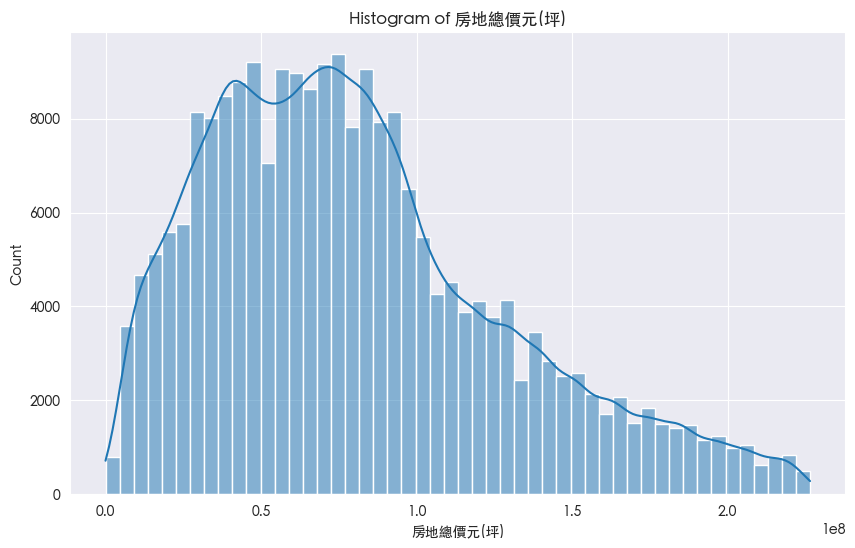

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df_2_cleaned_totalPrice['房地總價元(坪)'], bins=50, kde=True)
plt.title('Histogram of 房地總價元(坪)')
plt.show()

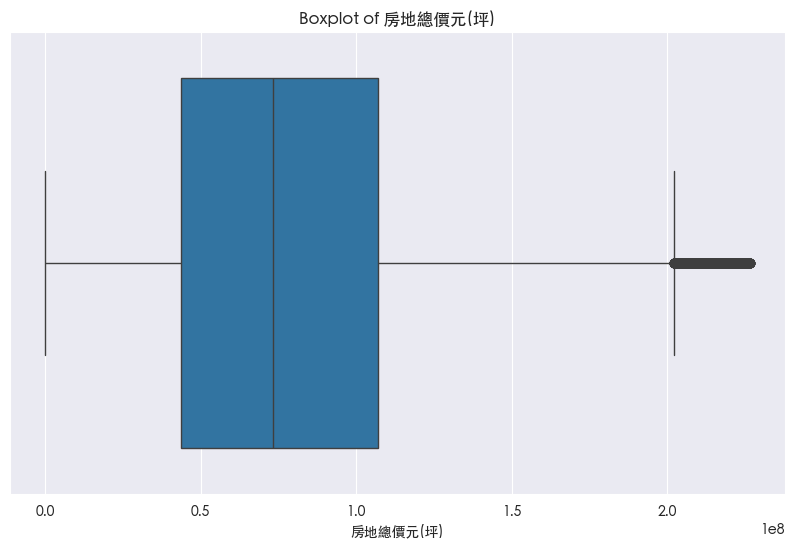

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_2_cleaned_totalPrice['房地總價元(坪)'])
plt.title('Boxplot of 房地總價元(坪)')
plt.show()

In [31]:
df_2_cleaned_unitPrice.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Column1', '鄉鎮市區', '交易標的', '土地位置建物門牌',
       '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '交易年月日', '交易筆棟數',
       '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材', '建築完成年月', '建物移轉總面積平方公尺',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '總價元',
       '單價元平方公尺', '車位類別', '車位移轉總面積(平方公尺)', '車位總價元', '備註', '編號', '主建物面積',
       '附屬建物面積', '陽台面積', '電梯', '移轉編號', '車位移轉總面積平方公尺', '建案名稱', '棟及號', '解約情形',
       '緯度', '經度', 'bad_count', 'good_count', '建築型態清整', '陽台有無', '是否含額外土地',
       '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝', '房地總價元', '格局比例_房',
       '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石', '建材_鋼筋', '建材_鋼骨',
       '建材_竹木', '住', '商', '工', '農', '交易年份', '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)'],
      dtype='object')

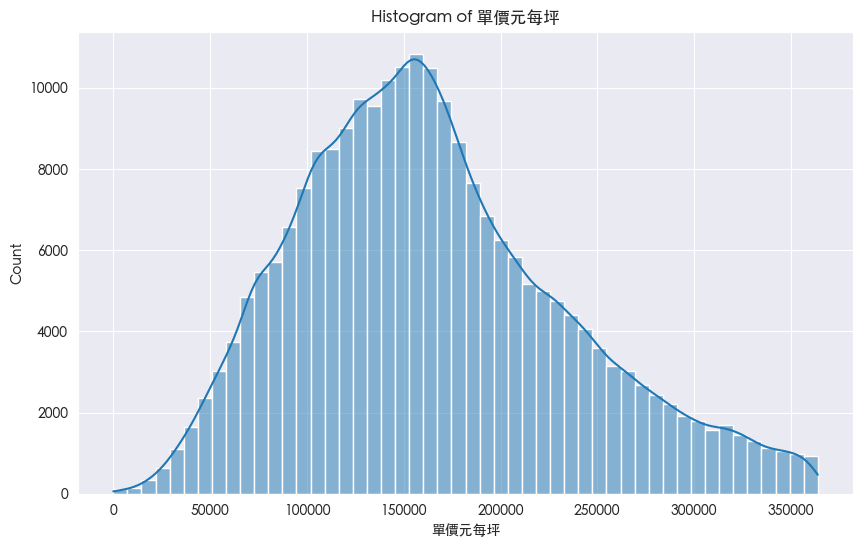

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df_2_cleaned_unitPrice['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪')
plt.show()

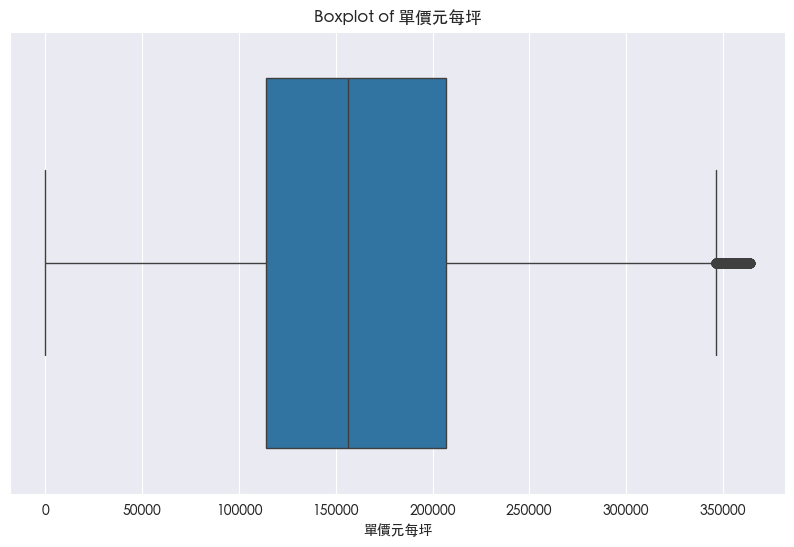

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_2_cleaned_unitPrice['單價元每坪'])
plt.title('Boxplot of 單價元每坪')
plt.show()

# houseAge category